In [84]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from xgboost import XGBClassifier
import random
import pickle # For saving models
import pandas as pd # Deal with csv files
import numpy as np # Deal with numerical arrays
import matplotlib.pyplot as plt # Plotting
from imblearn.over_sampling import BorderlineSMOTE
# All scikit-learn packages we need
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from math import sqrt

# Plotting tool build on matplotlib
import seaborn as sns

from joblib import dump
from collections import Counter

In [85]:
# Read data
X = pd.read_csv('processed_data.csv')

In [86]:
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_MidWest,addr_state_NorthEast,addr_state_SouthEast,addr_state_SouthWest,addr_state_West
0,30000,30000,30000.0,36,22.35,1151.16,4,20,100000.0,0.5,...,False,False,False,False,False,False,False,False,False,True
1,40000,40000,40000.0,60,16.14,975.71,3,14,45000.0,1.0,...,False,False,False,False,False,True,False,False,False,False
2,20000,20000,20000.0,36,7.56,622.68,1,3,100000.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,4500,4500,4500.0,36,11.31,147.99,2,8,38500.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,8425,8425,8425.0,36,27.27,345.18,5,25,450000.0,1.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303602,30000,30000,30000.0,60,17.09,747.03,4,16,80000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1303603,18000,18000,18000.0,60,30.65,589.57,6,29,77000.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1303604,17950,17950,17950.0,60,30.17,582.62,6,28,53758.0,0.5,...,False,False,False,False,False,True,False,False,False,False
1303605,15000,15000,15000.0,60,16.02,364.94,3,15,85000.0,1.0,...,False,False,False,False,False,False,True,False,False,False


In [87]:
Y=X['loan_status']

In [88]:
X.drop('loan_status', axis=1, inplace=True)

In [89]:
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_MidWest,addr_state_NorthEast,addr_state_SouthEast,addr_state_SouthWest,addr_state_West
0,30000,30000,30000.0,36,22.35,1151.16,4,20,100000.0,0.5,...,False,False,False,False,False,False,False,False,False,True
1,40000,40000,40000.0,60,16.14,975.71,3,14,45000.0,1.0,...,False,False,False,False,False,True,False,False,False,False
2,20000,20000,20000.0,36,7.56,622.68,1,3,100000.0,0.0,...,False,False,False,False,False,False,False,False,False,True
3,4500,4500,4500.0,36,11.31,147.99,2,8,38500.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,8425,8425,8425.0,36,27.27,345.18,5,25,450000.0,1.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303602,30000,30000,30000.0,60,17.09,747.03,4,16,80000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
1303603,18000,18000,18000.0,60,30.65,589.57,6,29,77000.0,1.0,...,False,False,False,False,False,False,False,False,True,False
1303604,17950,17950,17950.0,60,30.17,582.62,6,28,53758.0,0.5,...,False,False,False,False,False,True,False,False,False,False
1303605,15000,15000,15000.0,60,16.02,364.94,3,15,85000.0,1.0,...,False,False,False,False,False,False,True,False,False,False


In [91]:
Y

0          1
1          1
2          1
3          1
4          1
          ..
1303602    0
1303603    0
1303604    1
1303605    1
1303606    1
Name: loan_status, Length: 1303607, dtype: int64

In [92]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (1303607, 100)
Y shape: (1303607,)


In [40]:
sample_size = 100000
X_sampled = X.sample(n=sample_size, random_state=42)
Y_sampled = Y.loc[X_sampled.index]

In [64]:
print("X_sampled shape:", X_sampled.shape)
print("Y_sampled shape:", Y_sampled.shape)

X_sampled shape: (100000, 100)
Y_sampled shape: (100000,)


In [42]:
X_sampled

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_MidWest,addr_state_NorthEast,addr_state_SouthEast,addr_state_SouthWest,addr_state_West
759460,3200,3200,3200.0,36,7.35,99.32,1,4,41000.0,0.5,...,False,False,False,False,False,False,False,False,False,True
387641,8000,8000,8000.0,36,13.18,270.25,3,13,80000.0,0.5,...,False,False,False,False,False,False,True,False,False,False
941595,25000,25000,25000.0,36,8.90,793.84,1,5,150000.0,1.0,...,False,False,False,False,False,False,False,False,True,False
614629,6000,6000,6000.0,36,9.17,191.28,2,7,51000.0,0.5,...,True,False,False,False,False,False,False,False,False,True
412179,35000,35000,34975.0,36,14.65,1207.30,3,15,200000.0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199031,8325,8325,8325.0,36,18.25,302.02,4,18,90000.0,0.5,...,False,False,False,False,False,False,True,False,False,False
1115355,6000,6000,6000.0,36,13.98,205.01,3,13,150000.0,0.5,...,False,False,False,False,False,False,False,False,False,True
920937,17625,17625,17625.0,36,20.49,659.42,5,21,40000.0,0.0,...,False,False,False,False,False,False,True,False,False,False
621878,9600,9600,9600.0,36,13.99,328.06,3,14,104000.0,0.5,...,False,False,False,False,False,True,False,False,False,False


In [43]:
Y_sampled

759460     1
387641     0
941595     1
614629     1
412179     1
          ..
1199031    0
1115355    1
920937     1
621878     1
803282     0
Name: loan_status, Length: 100000, dtype: int64

# Feature Selection

Optimal number of features : 10
Ranking [ 1  1  1  1  7  2 41 16 24 33 22 61 46 60 50  8 20 26 47 10 91 71  4 56
  1  3  1  1 82  1 55 84 86 88  6 27 37  5 13 35 29 80 72 40 11 19 48 44
 12 42 90 21 15 31 23 38 49 30 18 58 76  1 14 36 39 63 53 74 17 28 25 34
 79 68  1 69 32 77 81 83 64 87 54 57 70 78 65 45 66 89 85 75 43 51 67  9
 59 62 73 52]
Best features : Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'num_tl_30dpd', 'debt_settlement_flag'],
      dtype='object')


c:\Users\user\miniconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


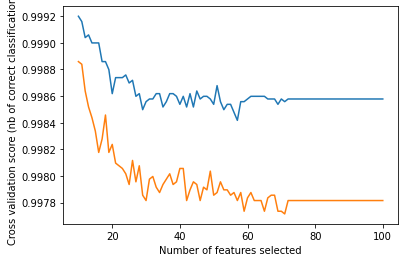

In [16]:
min_features_to_select = 10  # Minimum number of features to consider
rfecv = RFECV(estimator=XGBClassifier(), step=1, cv=StratifiedKFold(2),
              scoring=metrics.make_scorer(f1_score, average='weighted'),
              min_features_to_select=min_features_to_select)
rfecv.fit(X_sampled, Y_sampled)

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking %s" % rfecv.ranking_) # 重要程度排名
print('Best features :', X_sampled.columns[rfecv.support_])

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

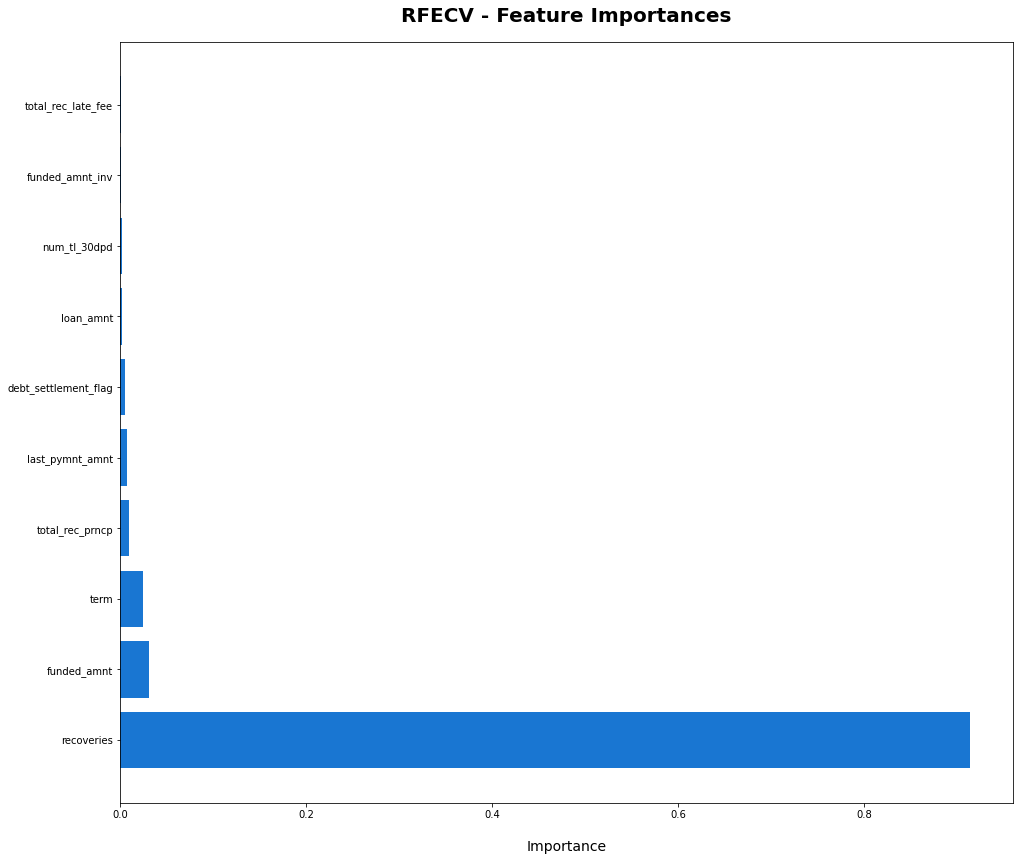

In [19]:
dset = pd.DataFrame()
dset['attr'] = X_sampled.columns[rfecv.support_]
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [18]:
dset

,attr,importance
6,recoveries,0.914499
1,funded_amnt,0.031380
3,term,0.025153
4,total_rec_prncp,0.009501
7,last_pymnt_amnt,0.007140
9,debt_settlement_flag,0.005558
0,loan_amnt,0.002405
8,num_tl_30dpd,0.002079
2,funded_amnt_inv,0.001388
5,total_rec_late_fee,0.000896


In [66]:
X=X[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'total_rec_prncp', 'total_rec_late_fee', 'recoveries',
       'last_pymnt_amnt', 'num_tl_30dpd', 'debt_settlement_flag']]

In [67]:
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,num_tl_30dpd,debt_settlement_flag
0,30000,30000,30000.0,36,30000.00,0.00,0.0,30082.32,0.0,0
1,40000,40000,40000.0,60,40000.00,0.00,0.0,40910.48,0.0,0
2,20000,20000,20000.0,36,20000.00,0.00,0.0,20228.39,0.0,0
3,4500,4500,4500.0,36,4500.00,0.00,0.0,4553.46,0.0,0
4,8425,8425,8425.0,36,8425.00,0.00,0.0,8754.30,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1303602,30000,30000,30000.0,60,2689.46,0.00,0.0,747.03,0.0,0
1303603,18000,18000,18000.0,60,1110.53,117.92,0.0,619.05,0.0,0
1303604,17950,17950,17950.0,60,17950.00,0.00,0.0,17965.90,0.0,0
1303605,15000,15000,15000.0,60,15000.00,0.00,0.0,14613.69,0.0,0


In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


In [69]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,num_tl_30dpd,debt_settlement_flag
930500,20950,20950,20950.0,36,5613.42,0.0,6.3,697.05,0.0,0
562857,15000,15000,14975.0,36,15000.00,0.0,0.0,4735.52,0.0,0
1056459,8000,8000,8000.0,36,8000.00,0.0,0.0,3322.37,0.0,0
51943,6400,6400,6400.0,36,6400.00,0.0,0.0,3350.94,0.0,0
361672,15000,15000,15000.0,36,15000.00,0.0,0.0,494.52,0.0,0
...,...,...,...,...,...,...,...,...,...,...
364122,3000,3000,3000.0,36,3000.00,0.0,0.0,101.74,0.0,0
327856,7550,7550,7550.0,36,7550.00,0.0,0.0,3637.98,0.0,0
3273,18300,18300,18300.0,60,18300.00,0.0,0.0,18467.86,0.0,0
492613,13450,13450,13250.0,36,13450.00,0.0,0.0,9247.89,0.0,0


In [70]:
X_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,num_tl_30dpd,debt_settlement_flag
765892,4000,4000,4000.0,36,4000.00,0.0,0.00,3047.74,0.000000,0
59556,5000,5000,5000.0,36,5000.00,0.0,0.00,2458.94,0.000000,0
648967,14000,14000,14000.0,60,14000.00,0.0,0.00,13608.56,0.000000,0
570325,24000,24000,24000.0,60,24000.00,0.0,0.00,998.60,0.000000,0
159300,7875,7875,7875.0,36,7875.00,0.0,0.00,7409.73,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
391816,8575,8575,8575.0,36,5727.99,0.0,0.00,308.17,0.000000,0
1140028,26000,26000,26000.0,36,9361.90,0.0,2432.28,909.19,0.000000,0
994700,23850,23850,23850.0,60,2493.19,0.0,1237.60,638.54,0.003436,0
35958,7000,7000,7000.0,36,7000.00,0.0,0.00,6327.52,0.000000,0


# Data Conversion

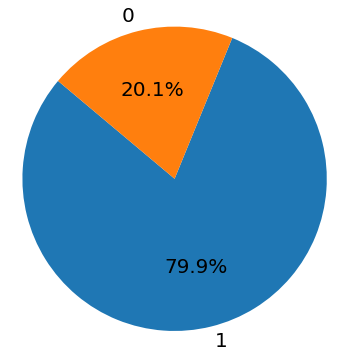

In [30]:

value_counts = Y_train.value_counts()
labels = value_counts.index
sizes = value_counts.values


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('loan status Value Distribution')
plt.show()

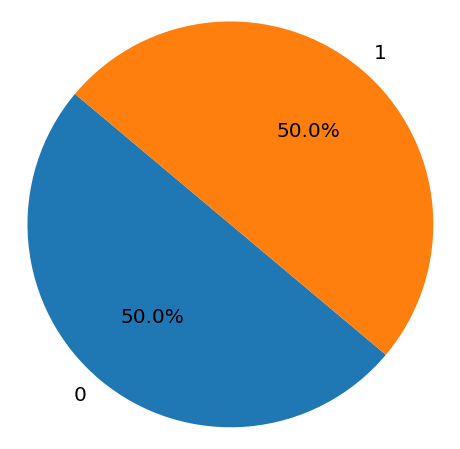

Original loan status shape: (1042885,)
Resampled loan status shape: (1667122,)


Counter({0: 833561, 1: 833561})

In [71]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
# smote = SMOTE(random_state=42)
borderline_smote = BorderlineSMOTE(random_state=42)
# X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
X_train_resampled, Y_train_resampled = borderline_smote.fit_resample(X_train, Y_train)

value_counts_resampled = Y_train_resampled.value_counts()
labels_resampled = value_counts_resampled.index
sizes_resampled = value_counts_resampled.values


plt.figure(figsize=(8, 8))
plt.pie(sizes_resampled, labels=labels_resampled, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 20})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.title('Balanced loan status Value Distribution after SMOTE')
plt.show()


print("Original loan status shape:", Y_train.shape)
print("Resampled loan status shape:", Y_train_resampled.shape)
Counter(Y_train_resampled)


In [72]:
X_train_resampled

,loan_amnt,funded_amnt,funded_amnt_inv,term,total_rec_prncp,total_rec_late_fee,recoveries,last_pymnt_amnt,num_tl_30dpd,debt_settlement_flag
0,20950,20950,20950.000000,36,5613.420000,0.000000,6.300000,697.050000,0.0,0
1,15000,15000,14975.000000,36,15000.000000,0.000000,0.000000,4735.520000,0.0,0
2,8000,8000,8000.000000,36,8000.000000,0.000000,0.000000,3322.370000,0.0,0
3,6400,6400,6400.000000,36,6400.000000,0.000000,0.000000,3350.940000,0.0,0
4,15000,15000,15000.000000,36,15000.000000,0.000000,0.000000,494.520000,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1667117,11766,11766,11766.196722,36,11367.577780,0.000000,1.233584,399.410685,0.0,0
1667118,14566,14566,14566.147246,37,13654.172528,3.596747,148.975173,448.971756,0.0,0
1667119,2755,2755,2755.238665,36,2652.548421,0.000000,41.096138,93.327955,0.0,0
1667120,2400,2400,2400.000000,36,2325.380811,0.000000,4.529357,75.254162,0.0,0


In [73]:
Y_train_resampled

0          0
1          1
2          1
3          1
4          1
          ..
1667117    0
1667118    0
1667119    0
1667120    0
1667121    0
Name: loan_status, Length: 1667122, dtype: int64

#  XGBoost

In [75]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train_resampled, Y_train_resampled)

Y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print(f"Recall:",recall_score(Y_test, Y_pred, average='weighted'))
print(f"Precision:",precision_score(Y_test, Y_pred, average='weighted'))
print(f"F1 Score:",f1_score(Y_test, Y_pred, average='weighted'))

c:\Users\user\miniconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Confusion Matrix:
 [[ 52258     73]
 [    13 208378]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52331
           1       1.00      1.00      1.00    208391

    accuracy                           1.00    260722
   macro avg       1.00      1.00      1.00    260722
weighted avg       1.00      1.00      1.00    260722

Accuracy Score: 0.9996701467463428
Recall: 0.9996701467463428
Precision: 0.9996701701041727
F1 Score: 0.9996700758834127


# CatBoost

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

# Assuming X_train_resampled, Y_train_resampled, X_test, and Y_test are already defined
# If not, you need to ensure that they are properly defined before proceeding

# Create the CatBoost model
model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           eval_metric='Accuracy',
                           random_seed=42,
                           logging_level='Verbose')

# Convert data to Pool objects
train_pool = Pool(data=X_train_resampled, label=Y_train_resampled)
test_pool = Pool(data=X_test, label=Y_test)

# Train the model
model.fit(train_pool, eval_set=test_pool, verbose=100, early_stopping_rounds=50)

# Make predictions
Y_pred = model.predict(X_test)

# Output evaluation results
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='weighted')
precision = precision_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"Accuracy: {acc}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


# Logistic Regression

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, Y_train_resampled)


Y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print(f"Recall:",recall_score(Y_test, Y_pred, average='weighted'))
print(f"Precision:",precision_score(Y_test, Y_pred, average='weighted'))
print(f"F1 Score:",f1_score(Y_test, Y_pred, average='weighted'))

c:\Users\user\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
 [[ 52326      5]
 [     0 208391]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52331
           1       1.00      1.00      1.00    208391

    accuracy                           1.00    260722
   macro avg       1.00      1.00      1.00    260722
weighted avg       1.00      1.00      1.00    260722

Accuracy Score: 0.9999808224852524
Recall: 0.9999808224852524
Precision: 0.9999808229453745
F1 Score: 0.9999808221421804


# Random Forest

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_resampled, Y_train_resampled)

Y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print(f"Recall:",recall_score(Y_test, Y_pred, average='weighted'))
print(f"Precision:",precision_score(Y_test, Y_pred, average='weighted'))
print(f"F1 Score:",f1_score(Y_test, Y_pred, average='weighted'))

Confusion Matrix:
 [[ 52244     87]
 [     2 208389]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     52331
           1       1.00      1.00      1.00    208391

    accuracy                           1.00    260722
   macro avg       1.00      1.00      1.00    260722
weighted avg       1.00      1.00      1.00    260722

Accuracy Score: 0.9996586402374943
Recall: 0.9996586402374943
Precision: 0.999658763809235
F1 Score: 0.9996585363111528


# DNN

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, Y_train_resampled, epochs=10, batch_size=128, validation_data=(X_test_scaled, Y_test))

Y_pred_proba = model.predict(X_test_scaled)
Y_pred = (Y_pred_proba > 0.5).astype(int)

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Accuracy Score:", accuracy_score(Y_test, Y_pred))
print(f"Recall:",recall_score(Y_test, Y_pred, average='weighted'))
print(f"Precision:",precision_score(Y_test, Y_pred, average='weighted'))
print(f"F1 Score:",f1_score(Y_test, Y_pred, average='weighted'))

Epoch 1/10
13025/13025 [==============================] - 13s 950us/step - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 2/10
13025/13025 [==============================] - 13s 1ms/step - loss: 0.0166 - accuracy: 0.9946 - val_loss: 0.0026 - val_accuracy: 0.9989
Epoch 3/10
13025/13025 [==============================] - 13s 1ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 4/10
13025/13025 [==============================] - 13s 1ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.0070 - val_accuracy: 0.9970
Epoch 5/10
13025/13025 [==============================] - 13s 1ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.0015 - val_accuracy: 0.9998
Epoch 6/10
13025/13025 [==============================] - 14s 1ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 7/10
13025/13025 [==============================] - 14s 1ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss:

# shap

In [ ]:
import matplotlib.pyplot as plt
import shap

# 使用SHAP解釋模型，並計算shap_values
shap_values = shap.Explainer(model, X_test)(X_test) 
plt.title("SHAP", fontsize=16, fontweight="bold", loc="center")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns) 